
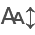

In [88]:
import pandas as pd
from itables import init_notebook_mode
from IPython.display import display, HTML
import matplotlib as plt
import plotly.express as px
from datetime import datetime
import numpy as np
from IPython.display import display, HTML
import seaborn as sns

init_notebook_mode(all_interactive=True)

In [89]:
df = pd.read_csv('job_offers_data.csv', sep=',')

---

# <span style="color: red;">EDA - 1 krok: kształt i opis danych

## Opis danych

#### Zbiór danych zawiera informacje o ofertach pracy zawartych w JustJoinIT.

#### Dane zostały pobrane ze wszystkich dostępnych obecnie stron (43 strony) <span style="color: orange;">w dniu 26/02 o godz. 17:15.

#### <span style="color: orange;">Kolumny:

* **Nazwa firmy** - tytuł oferty pracy,
* **Tytuł oferty** - nazwa oferty o pracę,
* **Kategoria** - kategoria oferty pracy na JustJoinIT,
* **Poziom doświadczenia** - poziomy doświadczenia (junior, mid, serior, c_level),
* **Umiejętności** - wymagane umiejętności (przedstawione w formie listy),
* **Mile widziane umiejętności** - lista mile widzianych umiejętności,
* **Czas pracy** - czasowy wymiar pracy (full-time, part-time itp),
* **Typ miejsca pracy** - forma wykonywania pracy (zdalna, hybrydowa, stacjonarna),
* **Typ umowy** - określenie formy zatrudnienia (B2B, freelancing, contract itp),
* **Widełki finansowe [PLN}** - zakres wynagrodzenia w walucie: PLN,
* **Wynagrodzenie brutto** - informacja o wynagrodzeniu brutto,
* **Województwo** - województwo, w którym znajduje się oferta pracy,
* **Miasto** - miasto, w którym znajduje się oferta pracy,
* **Ulica** - ulica, na której znajduje się siedziba firmy,
* **Otwarte dla obywateli Ukrainy** - otwartość na zatrudnienie pracowników z Ukrainy,
* **Zdalna rozmowa kwalifikacyjna** - informacja o możliwej zdalnej rozmowie kwalifikacyjnej,
* **Data publikacji oferty** - data opublikowania oferty.

### Losowe 5 rzędów

In [90]:
df.sample(5, random_state=123)

Nazwa firmy                                     Tytuł oferty  \
1422            Optiveum  System Administrator - security, authentication   
1652      emagine Polska               Data Engineer (Python, Databricks)   
1266                WAYF                      Junior Full Stack Developer   
1575           Winged IT                         Senior Node.js Developer   
1332  INNSOFT Sp. z o.o.                          Programista React, .NET   

      Kategoria Poziom doświadczenia  \
1422         13               senior   
1652         19                  mid   
1266          1               junior   
1575          1               senior   
1332          7                  mid   

                                           Umiejętności  \
1422       ABAC, Microsoft AD, Okta, Powershell, Python   
1652           Azure Databricks, CI/CD, PySpark, Python   
1266  Next.js, Node.js, React, React Native, TypeScript   
1575                           AWS, JavaScript, Node.js   
1332  .Net, Entity Framework, Express.js, GitLab, Je...   

     Mile widziane umiejętności Czas pracy Typ miejsca pracy Typ umowy  \
1422                        NaN  full_time            remote       B2B   
1652                        NaN  full_time            remote       B2B   
1266                        NaN  full_time            remote       B2B   
1575                        NaN  full_time            hybrid       B2B   
1332                        NaN  full_time            hybrid       B2B   

     Widełki finansowe [PLN]  Wynagrodzenie brutto  Województwo  \
1422         20000.0-25000.0                 False  mazowieckie   
1652         26800.0-31000.0                 False  mazowieckie   
1266           4000.0-9000.0                 False      łódzkie   
1575         27200.0-31200.0                 False  mazowieckie   
1332          8000.0-13000.0                 False  mazowieckie   

               Miasto             Ulica  Otwarte dla obywateli Ukrainy  \
1422         Warszawa      Krucza 16/22                           True   
1652         Warszawa    Domaniewska 39                          False   
1266  Poland (Remote)            Remote                          False   
1575         Warszawa            Prosta                           True   
1332         Warszawa  ul. Murmańska 25                          False   

      Zdalna rozmowa kwalifikacyjna            Data publikacji oferty  
1422                           True  2025-02-25 11:01:08.439000+00:00  
1652                           True  2025-02-24 14:01:49.396000+00:00  
1266                           True  2025-02-25 15:01:12.470000+00:00  
1575                           True  2025-02-24 16:01:42.627000+00:00  
1332                           True  2025-02-25 13:01:14.308000+00:00

In [91]:
display(HTML(f'<h3>Mamy zbiór danych o kształcie: <span style="color: orange;">{len(df)}</span> rzędów oraz <span style="color: orange;">{len(df.columns)}</span> kolumn</h3>'))

### Wartości unikatowe (<span style="color: red;">TOP 10</span>)

In [92]:
unique_values_df = df.nunique().reset_index()
unique_values_df.columns = ['Kolumna', 'Liczba unikatowych wartości']
# obliczam procentowy odsetek wartości unikatowych
unique_values_df['Odsetek procentowy [%]'] = round((unique_values_df['Liczba unikatowych wartości'] / len(df)) * 100, 2)
top_10_unique_values = unique_values_df.sort_values(by='Odsetek procentowy [%]', ascending=False).head(10)
top_10_unique_values.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

### Duplikaty

In [93]:
duplicates_sum = int(df.duplicated().sum())

display(HTML(f'<h3>W całym analizowanym zbiorze danych znaleziono: <span style="color: orange;"> {duplicates_sum} duplikatów</h3>'))

In [94]:
duplicates_info = {}

# Filtracja tylko wyszczególnionych kolumn
columns_to_duplicates_check = ['Nazwa firmy', 'Tytuł oferty', 'Umiejętności']

for column in columns_to_duplicates_check:
    duplicates_count = df[column].duplicated().sum()
    duplicates_info[column] = duplicates_count
    
display(HTML('<h3>Jednak warto zauważyć iż poszczególne wartości w kolumnach się powtarzały:</h3>'))
for col, count in duplicates_info.items():
    display(HTML(f'<h4>W kolumnie <span style="color: orange;">{col}</span> znaleziono: <span style="color: orange;">{count} duplikatów</h4>'))

### Informacje o kolumnach (typy danych)

In [95]:
types_df = pd.DataFrame(df.dtypes, columns=['Dtype']).reset_index()
types_df.columns = ['Kolumna', 'Typ danych']

# typy danych przynależne do poszczególnych kolumn
types_df

Kolumna Typ danych
0                     Nazwa firmy     object
1                    Tytuł oferty     object
2                       Kategoria      int64
3            Poziom doświadczenia     object
4                    Umiejętności     object
5      Mile widziane umiejętności     object
6                      Czas pracy     object
7               Typ miejsca pracy     object
8                       Typ umowy     object
9         Widełki finansowe [PLN]     object
10           Wynagrodzenie brutto       bool
11                    Województwo     object
12                         Miasto     object
13                          Ulica     object
14  Otwarte dla obywateli Ukrainy       bool
15  Zdalna rozmowa kwalifikacyjna       bool
16         Data publikacji oferty     object

### Zmieniam zatem kolumnę `Data publikacji oferty` na typ `datetime`

In [96]:
# zmiana danych czasowych na typ: datetime 
df['Data publikacji oferty'] = pd.to_datetime(df['Data publikacji oferty'], errors='coerce').dt.tz_convert('Europe/Warsaw') # coerce - ustawia wszystkie nierozpoznane formaty jako NaT (Not a Time)

### Dodatkowo tworzę nowe dwie kolumny zawierające `Min_wynagrodzenie` oraz `Max_wynagrodzenie` w typie numerycznym (co przyda się następnie do określenia statystyk)

In [97]:
df[['Min_wynagrodzenie', 'Max_wynagrodzenie']] = df['Widełki finansowe [PLN]'].str.split('-', expand=True) # expand=True - pozwala zwrócić wynik jako nowy DF

df['Min_wynagrodzenie'] = df['Min_wynagrodzenie'].astype(dtype=float)
df['Max_wynagrodzenie'] = df['Max_wynagrodzenie'].astype(dtype=float)

In [98]:
types_df = pd.DataFrame(df.dtypes, columns=['Dtype']).reset_index()
types_df.columns = ['Kolumna', 'Typ danych']

# typy danych przynależne do poszczególnych kolumn
types_df

Kolumna                     Typ danych
0                     Nazwa firmy                         object
1                    Tytuł oferty                         object
2                       Kategoria                          int64
3            Poziom doświadczenia                         object
4                    Umiejętności                         object
5      Mile widziane umiejętności                         object
6                      Czas pracy                         object
7               Typ miejsca pracy                         object
8                       Typ umowy                         object
9         Widełki finansowe [PLN]                         object
10           Wynagrodzenie brutto                           bool
11                    Województwo                         object
12                         Miasto                         object
13                          Ulica                         object
14  Otwarte dla obywateli Ukrainy                           bool
15  Zdalna rozmowa kwalifikacyjna                           bool
16         Data publikacji oferty  datetime64[ns, Europe/Warsaw]
17              Min_wynagrodzenie                        float64
18              Max_wynagrodzenie                        float64

### Zliczam typy danych

In [99]:
count_types_df = types_df['Typ danych'].value_counts().reset_index()
count_types_df.columns = ['Typ danych', 'Ilość']

# zliczone typy danych
count_types_df

Typ danych  Ilość
0                         object     12
1                           bool      3
2                        float64      2
3                          int64      1
4  datetime64[ns, Europe/Warsaw]      1

### Statystyki opisowe

In [100]:
df.describe().round(2).T

count      mean      std   min      25%      50%      75%  \
Kategoria          2176.0     12.09     7.31   1.0      6.0     12.0     19.0   
Min_wynagrodzenie  2176.0  18318.22  7193.42  10.0  13737.5  18480.0  23350.0   
Max_wynagrodzenie  2176.0  23745.37  8315.97  30.0  19000.0  24000.0  28560.0   

                       max  
Kategoria             25.0  
Min_wynagrodzenie  54600.0  
Max_wynagrodzenie  65520.0

### Podsumowanie 1 kroku EDA
* rynek IT jest niezwykle dynamiczny co pokazuje fakt, aż `90%`ofert pod kątem umiejętności jest unikatowych
* większy odstetek, bo niemal `60%` pracodawców ma powtarzalne oferty finansowe
* niemal 3/4 firm się powtarza na rynku IT o czym świadczy fakt, iż istnieje tylko `25.51%` unikatowych nazw firm
* unaocznia się popyt na oferty IT zależny od geolokalizacji (oferty pochodzą zaledwie z `40` miast w Polsce)
* występują duplikaty w pojedynczych kolumnach, tj: `Nazwa firmy`, `Tytuł oferty` czy `Umiejętności` - co świadczy o tym, iż Ci sami pracodawcy oferują różne stanowiska z róznym wymogiem umiejętności
* dokonano dwóch przekształceń danych (zmieniono kolumnę `Data publikacji oferty` na `datetime` oraz utworzono kolumny numeryczne `Min_wynagrodzenie` i `Max_wynagrodzenie`)
* z podstawowych statystyk opisowych wynika, iż:
    - zachodzi duża zmienność między kategoriami ofert (`std=7.31`)
    - nie ma żadnych informacji o danych z `Mile widziane umiejętności`
    - istnieją zauważalne outliery przy ofertach finansowych (np. `min=30` nawet dla `Max_wynagrodzenie`)

---

# <span style="color: red;">EDA - krok 2: analiza brakujących wartości

### Ilościowe i procentowe zestawienie brakujących wartości w analizowanym zbiorze danych:

In [101]:
missing_values_df = df.isnull().sum().reset_index()
missing_values_df.columns = ['Kolumna', 'Liczba brakujących wartości']
missing_values_df['Odsetek procentowy [%]'] = round((missing_values_df['Liczba brakujących wartości'] / len(df)) * 100, 2)
top_5_missing_values = missing_values_df.sort_values(by='Odsetek procentowy [%]', ascending=False).head(5)
top_5_missing_values.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

### Z powodu braku informacji - usuwam permanentnie kolumnę `Mile widziane umiejętności`

In [102]:
df.drop(columns='Mile widziane umiejętności', inplace=True)

In [103]:
if 'Mile widziane umiejętności' not in df.columns:
    display(HTML('<h3>Usunięto kolumnę <span style="color: orange;">Mile widziane umiejętności</span></h3>'))

### Podsumowanie 2 kroku EDA:
* usunięto kolumnę `Mile widziane umiejętności` ze względu na brak jakichkolwiek informacji
* zauważalne brakujące wartości (`14.49%`) występują wyłącznie dla kolumny `Ulica`, ale jest to powszechne zjawisko, iż pracodawca podaje jedynie `Miasto` jako główną geolokalizację oferty

---

# <span style="color: red;">EDA - krok 3: eksploracja pojedynczych komórek

### Analiza rozkładu danych (histogramy)

#### Wnioski:
- najwięcej kategorii znajduje się wśród oznaczeń `1`, `6-7`, a najmniej wśród `8-9`
- najwięcej ofert zostało opublikowanych do tygodnia wstecz momentu pobrania danych (`01.03.2025`)
- dla `Min_wynagrodzenie` występuje najczęściej przedział `15-25k`
- dla `Max_wynagrodzenie` występuje najczęściej przedział `20-30k`

In [104]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tworzenie subplots (2 kolumny, 2 wiersze)
fig = make_subplots(rows=2, cols=2)

# Histogram dla "Kategoria"
fig.add_trace(
    go.Histogram(x=df['Kategoria'], nbinsx=20, marker_color='#1E90FF', name='Histogram: Kategoria', showlegend=True),
    row=1, col=1
)

# Histogram dla "Data Publikacji oferty"
fig.add_trace(
    go.Histogram(x=df['Data publikacji oferty'].dt.strftime('%Y-%m-%d %H:%M:%S'), nbinsx=20, marker_color='#FF6347', name='Histogram: Data publikacji oferty', showlegend=True),  # Kolor: Tomato
    row=1, col=2
)

# Histogram dla "Min_widelki"
fig.add_trace(
    go.Histogram(x=df['Min_wynagrodzenie'], nbinsx=20, marker_color='#4682B4', name='Histogram: Min wynagrodzenie', showlegend=True),  # Kolor: Steel Blue
    row=2, col=1
)

# Histogram dla "Max_widelki"
fig.add_trace(
    go.Histogram(x=df['Max_wynagrodzenie'], nbinsx=20, marker_color='#32CD32', name='Histogram: Max wynagrodzenie', showlegend=True),  # Kolor: Lime Green
    row=2, col=2
)

# Ustawienia osi x i y z wielkością czcionki
fig.update_xaxes(title_text='Kategoria', row=1, col=1, title_font=dict(size=18))
fig.update_yaxes(title_text='Ilość', row=1, col=1, title_font=dict(size=16))

fig.update_xaxes(title_text='Data Publikacji', row=1, col=2, title_font=dict(size=18))
fig.update_yaxes(title_text='Ilość', row=1, col=2, title_font=dict(size=16))

fig.update_xaxes(title_text='Minimalne wynagrodzenie', row=2, col=1, title_font=dict(size=18))
fig.update_yaxes(title_text='Ilość', row=2, col=1, title_font=dict(size=16))

fig.update_xaxes(title_text='Maksymalne wynagrodzenie', row=2, col=2, title_font=dict(size=18))
fig.update_yaxes(title_text='Ilość', row=2, col=2, title_font=dict(size=16))

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład podstawowych danych', x=0.5, xanchor='center', font=dict(size=24)),
    height=800,  # Ustaw wysokość wykresu
    width=1000     # Ustaw szerokość wykresu
)

fig.show()

### Przeanalizowanie kolumny `Kategoria`

#### Mamy 25 unikatowych wartości

In [105]:
df['Kategoria'].nunique()

25

#### Dysponujemy kategoriami 1-25

In [106]:
df['Kategoria'].unique()

array([ 6, 10,  3, 24, 11,  1, 19, 17,  5, 25, 23, 22,  9, 12,  2, 15, 21,
       13,  7,  4, 14, 20, 18, 16,  8])

### Zmapowanie numerów kategorii z odpowiadającymi im nazwami z JustJoinIT (i zaktualizowanie DataFrame)

In [107]:
# Dołączam mapowane kategorie - na podstawie danych z JustJoinIT
category_map = {
    1: 'JS',
    2: 'HTML',
    3: 'PHP',
    4: 'Ruby',
    5: 'Python',
    6: 'Java',
    7: 'Net',
    8: 'Scala',
    9: 'C',
    10: 'Mobile',
    11: 'Testing',
    12: 'DevOps',
    13: 'Admin',
    14: 'UX/UI',
    15: 'PM',
    16: 'Game',
    17: 'Analytics',
    18: 'Security',
    19: 'Data',
    20: 'Go',
    21: 'Support',
    22: 'ERP',
    23: 'Architecture',
    24: 'Other',
    25: 'AI/ML'
}

# Tworzę DF z unikatowymi nazwami kategorii
df['Kategoria'] = df['Kategoria'].map(category_map)

### Wyświetlenie rozkładu ilościowego kategorii

#### Wnioski:
- najwięcej ofert znajduje się w kategoriach: `JS`, `Java` oraz `Data` i stanowią one niemal `32%` wszystkich dostępnych ofert

In [108]:
categories_counts = df['Kategoria'].value_counts()
categories_counts = categories_counts.reset_index()
categories_counts.columns = ['Kategoria', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.bar(categories_counts, x='Kategoria', y='Ilość',)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Ilościowe zestawienie kategorii występujące wśród JustJoinIT', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Kategoria', font=dict(size=18)),
    yaxis_title=dict(text='Ilość', font=dict(size=18)),
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [109]:
# Obliczanie całkowitej liczby ofert
offers_sum = len(df)

# Obliczanie odsetka procentowego
categories_counts['Odsetek procentowy [%]'] = round((categories_counts['Ilość'] / offers_sum) * 100, 2)

# Zbieranie dziesięciu najliczniejszych kategorii
top_10_categories = categories_counts.nlargest(10, 'Ilość')

top_10_categories.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

## Przeanalizowanie kolumny `Nazwa firmy`

### Wyświetlenie 10 najczęściej zatrudniających firm

#### Wnioski:
- najczęściej zatrudniającą firmą jest `Link Group` i liczba ofert tego pracodawcy stanowi `4.78%` wszystkich ofert

In [110]:
names_counts = df['Nazwa firmy'].value_counts().nlargest(10).reset_index()
names_counts.columns = ['Nazwa firmy', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.bar(names_counts, x='Nazwa firmy', y='Ilość')

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Najczęstsze firmy oferujące pracę w IT', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Nazwa firmy', font=dict(size=18)),
    yaxis_title=dict(text='Ilość', font=dict(size=18)),
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [111]:
# Obliczanie odsetka procentowego
names_counts['Odsetek procentowy [%]'] = round((names_counts['Ilość'] / offers_sum) * 100, 2)

names_counts.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

## Przeanalizowanie kolumny `Umiejętności`

### Wyświetlenie 10 najczęściej wymaganych umiejętności

#### Wnioski:
- najczęściej wymaganymi umiejętnościami są: języki programowania `Python`, `SQL` oraz `Java`, które sumarycznie stanowią ponad połowę (`55.73%`) wszystkich wymaganych umiejętności na rynku IT
- pracodawcy wymagają również znajomości języka angielskiego (`13.37%`) i obsługi narzędzi chmurowych `AWS`, które stanowi `12.98%` wszystkich umiejętności

In [112]:
skills_series = df['Umiejętności'].str.split(', ').explode()

skills_counts = skills_series.value_counts().nlargest(10).reset_index()
skills_counts.columns = ['Umiejętność', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.bar(skills_counts, x='Umiejętność', y='Ilość')

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Najczęstsze wymagane umiejętności', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Nazwa firmy', font=dict(size=18)),
    yaxis_title=dict(text='Ilość', font=dict(size=18)),
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [113]:
# Obliczanie odsetka procentowego
skills_counts['Odsetek procentowy [%]'] = round((skills_counts['Ilość'] / offers_sum) * 100, 2)

skills_counts.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

## Przeanalizowanie kolumny `Tytuł oferty`

### Wyświetlenie 10 najczęściej występujących stanowisk

#### Wnioski:
- najwięcej ofert znajduje się na stanowiskach: `Data Engineer`, `DevOps Engineer` oraz `Senior Java Developer` 
- nie ma tytułów stanowisk, które stanowiłyby istotny procent w stosunku do całkowitej liczby ofert (`max=1.17%`)

In [114]:
titles_counts = df['Tytuł oferty'].value_counts().nlargest(10).reset_index()
titles_counts.columns = ['Tytuł oferty', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.bar(titles_counts, x='Tytuł oferty', y='Ilość')

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Najczęściej występujące tytuły ofert', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Nazwa firmy', font=dict(size=18)),
    yaxis_title=dict(text='Ilość', font=dict(size=18)),
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [115]:
# Obliczanie odsetka procentowego
titles_counts['Odsetek procentowy [%]'] = round((titles_counts['Ilość'] / offers_sum) * 100, 2)

titles_counts.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

## Przeanalizowanie kolumn zawierających dane geolokalizacyjne: `Województwo` oraz `Miasto`

### Zestawienie 10 najczęściej występujących województw oraz miast

#### Wnioski:
- niemal połowa wszystkich ofert IT pochodzi ze stolicy Polski (aż `51.15%`)

In [116]:
# Zliczanie województw
voivodeships_counts = df['Województwo'].value_counts().reset_index()
voivodeships_counts.columns = ['Województwo', 'Ilość']

# Zliczanie miast
cities_counts = df['Miasto'].value_counts().reset_index()
cities_counts.columns = ['Miasto', 'Ilość']

# Wybór 10 najczęściej występujących województw
top_10_voivodeships = voivodeships_counts.nlargest(10, 'Ilość')

# Wybór 10 najczęściej występujących miast
top_10_cities = cities_counts.nlargest(10, 'Ilość')

# Przygotowanie danych do wykresu
top_10_voivodeships['Typ'] = 'Województwo'
top_10_cities['Typ'] = 'Miasto'

# Połączenie danych w jeden DataFrame
combined_geodata = pd.concat([top_10_voivodeships, top_10_cities.rename(columns={'Miasto': 'Województwo'})], ignore_index=True)

# Tworzenie wykresu słupkowego
fig = go.Figure()

# Dodawanie słupków dla województw
fig.add_trace(go.Bar(
    x=top_10_voivodeships['Województwo'],
    y=top_10_voivodeships['Ilość'],
    name='Województwa',
    marker_color='blue'  
))

# Dodawanie słupków dla miast
fig.add_trace(go.Bar(
    x=top_10_cities['Miasto'],
    y=top_10_cities['Ilość'],
    name='Miasta',
    marker_color='orange'  
))


fig.update_layout(
    title=dict(text='10 Najczęściej Występujących Województw i Miast', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Województwo/Miasto', font=dict(size=18)),
    yaxis_title=dict(text='Liczba wystąpień', font=dict(size=18)),
    barmode='overlay',
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [117]:
# Obliczanie odsetka procentowego
cities_counts['Odsetek procentowy [%]'] = round((cities_counts['Ilość'] / offers_sum) * 100, 2)

cities_counts.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

## Przeanalizowanie danych finansowych: `Widełki finansowe [PLN]` oraz `Wynagrodzenie brutto`

### Wyświetlenie 10 najczęściej występujących stanowisk

#### Wnioski:
- widełki finansowe występują najczęściej w zakresie `15k-30k`, jednak stanowi to zaledwie `5.36%` wszystkich ofert
- można zaaobserwować dynamikę rynku IT poprzez fakt, iż nie ma dominujących widełek finansowych (`max=1.46%`), zatem pracodawcy indywidualnie ustawiają wynagrodzenia względem każdej oferty 
- uwzględniając średnie wynagrodzenie brutto - unaocznia się fakt, iż wynagrodzenie rośnie proporcjonalnie wraz z poziomem doświadczenia, jednak im wyższy szczebel tym mniejsza zmiana (analogicznie dla mediany)
- np. `mid` zarobi `2.09%` więcej niż `junior`, podczas gdy na najwyższym szczeblu `c_level` zarobi się jedynie `1.22%` więcej od stanowiska `senior`
- jedynie `15.3%` pracodawców podaje jawnie informacje o wynagrodzeniu brutto

In [118]:
financial_ranges_counts = df['Widełki finansowe [PLN]'].value_counts().nlargest(10).reset_index()
financial_ranges_counts.columns = ['Widełki finansowe [PLN]', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.bar(financial_ranges_counts, x='Widełki finansowe [PLN]', y='Ilość')

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Najczęstsze podawane widełki finansowe w PLN', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Widełki finansowe', font=dict(size=18)),
    yaxis_title=dict(text='Ilość', font=dict(size=18)),
    width=800,
    height=600

)

# Wyświetlenie wykresu
fig.show()

In [119]:
# Obliczanie odsetka procentowego
financial_ranges_counts['Odsetek procentowy [%]'] = round((financial_ranges_counts['Ilość'] / offers_sum) * 100, 2)

financial_ranges_counts.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]' : '{:.2f}'}).hide(axis='index')

In [120]:
# Filtruj dane, aby uwzględnić tylko te, w których 'Wynagrodzenie brutto' = True
gross_df = df[df['Wynagrodzenie brutto'] == True].copy()

# Funkcja do obliczania średniej dla widełek finansowych
def calculate_average(financial_range):
    low, high = map(float, financial_range.split('-'))
    return (low + high) / 2

# Tworzenie nowej kolumny ze średnimi widełkami finansowymi
gross_df['Średnie wynagrodzenie'] = gross_df['Widełki finansowe [PLN]'].apply(calculate_average)

# Zliczanie średnich widełek finansowych w zależności od poziomu doświadczenia
average_ranges = gross_df.groupby(['Poziom doświadczenia'])['Średnie wynagrodzenie'].mean().reset_index()

# Sortowanie według średniej
average_ranges['Średnie wynagrodzenie'] = average_ranges['Średnie wynagrodzenie'].round(2)

# Wybierz 10 najczęściej występujących poziomów doświadczenia
top_10_average_ranges = average_ranges.nlargest(10, 'Średnie wynagrodzenie')

# Tworzenie wykresu słupkowego dla średnich widełek finansowych
fig = px.bar(top_10_average_ranges, 
             x='Poziom doświadczenia', 
             y='Średnie wynagrodzenie', 
             color='Poziom doświadczenia',
             text='Średnie wynagrodzenie'  # Ustawienie etykiet
            )

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Średnie wynagrodzenie brutto według poziomu doświadczenia [PLN]', x=0.5, xanchor='center', font=dict(size=22)),
    xaxis_title=dict(text='Doświadczenie', font=dict(size=18)),
    yaxis_title=dict(text='Wysokość wynagrodzenia', font=dict(size=18)),
    width=800,
    height=600
)

# Aktualizacja etykiet na słupkach
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Etykiety z formatowaniem

# Wyświetlenie wykresu
fig.show()

In [121]:
# Zliczanie mediany widełek finansowych w zależności od poziomu doświadczenia
median_ranges = gross_df.groupby(['Poziom doświadczenia'])['Średnie wynagrodzenie'].median().reset_index()

# Sortowanie według mediany
median_ranges['Średnie wynagrodzenie'] = median_ranges['Średnie wynagrodzenie'].round(2)

# Wybierz 10 najczęściej występujących poziomów doświadczenia
top_median_ranges = median_ranges.nlargest(10, 'Średnie wynagrodzenie')

# Tworzenie wykresu słupkowego dla median widełek finansowych
fig = px.bar(
    top_median_ranges, 
    x='Poziom doświadczenia', 
    y='Średnie wynagrodzenie', 
    color='Poziom doświadczenia',
    text='Średnie wynagrodzenie'  # Ustawienie etykiet
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Mediana wynagrodzenia brutto według poziomu doświadczenia [PLN]', x=0.5, xanchor='center', font=dict(size=22)),
    xaxis_title=dict(text='Doświadczenie', font=dict(size=18)),
    yaxis_title=dict(text='Wysokość wynagrodzenia', font=dict(size=18)),
    width=800,
    height=600
)

# Aktualizacja etykiet na słupkach
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Etykiety z formatowaniem

# Wyświetlenie wykresu
fig.show()

In [122]:
# Sortowanie według średniego wynagrodzenia malejąco
average_ranges.sort_values(by='Średnie wynagrodzenie',  inplace=True)

# Obliczanie zmiany procentowej
average_ranges['Procentowa zmiana z poprzedniego doświadczenia'] = round(average_ranges['Średnie wynagrodzenie'].div(
    average_ranges['Średnie wynagrodzenie'].shift(1)).fillna(1), 2)

# Zmiana wartości na opisową
average_ranges['O ile procentowo zwiększy się wynagrodzenie wraz ze wzrostem doświadczenia'] = average_ranges['Procentowa zmiana z poprzedniego doświadczenia'].apply(
    lambda x: f"x {round(x, 2)}" if x > 1 else None
).fillna('Brak')

average_ranges.drop(columns='Procentowa zmiana z poprzedniego doświadczenia', inplace=True)

average_ranges.rename(columns={'O ile procentowo zwiększy się wynagrodzenie wraz ze wzrostem doświadczenia':  'Procentowy wzrost pensji wraz ze wzrostem doświadczenia'}, inplace=True)

average_ranges.style.bar(
    subset='Średnie wynagrodzenie',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=50000
).format({'Średnie wynagrodzenie' : '{:.2f}'}).hide(axis='index')

In [123]:
gross_counts = df['Wynagrodzenie brutto'].value_counts().reset_index()
gross_counts.columns = ['Wynagrodzenie brutto', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.pie(gross_counts, names='Wynagrodzenie brutto', values='Ilość')

# Pokaż procenty i etykiety na wykresie
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=16, color='black'),
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład kołowy dla wynagrodzeń brutto', x=0.5, xanchor='center', font=dict(size=24)),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()

## Przeanalizowanie kolumny `Data publikacji oferty`

### Wyświetlenie szeregu czasowego z uwzględnioną fragmentacją dzienną

#### Wnioski:
- najwięcej ofert zostało opublikowanych `27.02.2025` (czyli 2 dni przez przeprowadzoną analizą strony JustJoinIT)
- na dzień 01.03.2025 - `60.94%` ofert pochodzi z trzech dni poprzedzających dzień analizy
- nie zaobserwowano zauważalnego wpływu dnia tygodnia na ilość publikowanych ofert
- zdumiewa fakt, iż dane zostały pobrane o godz. 13:00 w dniu 01.03.2025, natomiast już JustJoinIT zdążyło opublikować nowe oferty, stanowiące `6.94%` wszystkich ofert

In [124]:
# Zliczanie liczby ofert dla każdego dnia
daily_counts = df.resample('D', on='Data publikacji oferty').size().reset_index(name='Ilość')

# Tworzenie wykresu Time Series Plot
fig = px.line(daily_counts, x='Data publikacji oferty', y='Ilość')

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Liczba dziennych publikacji ofert', x=0.5, xanchor='center', font=dict(size=24)),
    xaxis_title=dict(text='Data publikacji oferty', font=dict(size=18)),
    yaxis_title=dict(text='Liczba ofert', font=dict(size=18)),
    width=800,
    height=600
)

# Znalezienie maksymalnej wartości i odpowiadającej daty
max_data_value = daily_counts['Ilość'].max()
max_date = daily_counts.loc[daily_counts['Ilość'] == max_data_value, 'Data publikacji oferty'].iloc[0]

# Dodanie punktu na wykresie dla najwyższego piku
fig.add_trace(px.scatter(daily_counts[daily_counts['Ilość'] == max_data_value],
                          x='Data publikacji oferty', 
                          y='Ilość').data[0])

# Dodanie adnotacji dla max_date
fig.add_annotation(
    x=max_date,
    y=max_data_value,
    text=f'<b>Dzień: {max_date.strftime("%Y-%m-%d")}<br>Liczba ofert: {max_data_value}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='red')
)


# Wyświetlenie wykresu
fig.show()

### Zestawienie 10 dni z największymi ilościami opublikowanych ofert (analizy dokonano pobierając dane ze strony JustJoinIT - 01.03.2025 o godz. 13:00)

In [125]:
# Wybieranie 10 dni z największą ilością publikacji
top_7_days = daily_counts.nlargest(10, 'Ilość')

# Sortowanie malejąco według liczby ofert
top_7_days = top_7_days.sort_values(by='Ilość', ascending=False)

# Formatowanie daty w formacie %Y-%m-%d
top_7_days['Data publikacji oferty'] = top_7_days['Data publikacji oferty'].dt.strftime('%Y-%m-%d')

# Dodawanie kolumny 'dzien tyg' 
top_7_days['Dzień tygodnia'] = pd.to_datetime(top_7_days['Data publikacji oferty']).dt.day_name()

# Obliczenie procentów
offers_sum = daily_counts['Ilość'].sum()
top_7_days['Odsetek procentowy [%]'] = round((top_7_days['Ilość'] / offers_sum) * 100, 2)

# Mapowanie angielskich dni tygodnia na polskie odpowiedniki
day_translation = {
    'Monday': 'Poniedziałek',
    'Tuesday': 'Wtorek',
    'Wednesday': 'Środa',
    'Thursday': 'Czwartek',
    'Friday': 'Piątek',
    'Saturday': 'Sobota',
    'Sunday': 'Niedziela'
}

top_7_days['Dzień tygodnia'] = top_7_days['Dzień tygodnia'].map(day_translation)

# Zmiana kolejności kolumn
top_7_days = top_7_days[['Data publikacji oferty', 'Dzień tygodnia', 'Ilość', 'Odsetek procentowy [%]']]

# Stylowanie wyników: kolumna procentowa
top_7_days.style.bar(
    subset='Odsetek procentowy [%]',
    color='#d65f5f',
    align='left',
    vmin=0,
    vmax=100
).format({'Odsetek procentowy [%]': '{:.2f}'}).hide(axis='index')

## Przeanalizowanie kolumny `Poziom doświadczenia`

### Wyświetlenie rozkładu kołowego dla poziomów doświadczenia

#### Wnioski:
- niemal wszystkie obecne oferty pracy dotyczą poziomów: `mid` oraz `senior` (aż `94.6%`)
- unaocznia to fakt, że co raz ciężej wejść na rynek dla osoby z małym doświadczeniem lub jego całkowitym brakiem
- zaledwie `1.06%` stanowią oferty na najwyższych szczeblach kierowniczych

In [126]:
experiences_counts = df['Poziom doświadczenia'].value_counts().reset_index()
experiences_counts.columns = ['Poziom doświadczenia', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.pie(experiences_counts, names='Poziom doświadczenia', values='Ilość')

# Pokaż procenty i etykiety na wykresie
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=16, color='black'),
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład kołowy dla poziomów doświadczenia', x=0.5, xanchor='center', font=dict(size=24)),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()

## Przeanalizowanie kolumny `Czas pracy`

### Wyświetlenie rozkładu kołowego dla dostępnych możliwości czasowych pracy

#### Wnioski:
- niemal wszystkie obecne oferty pracy dotyczą standardowej pracy na pełen etat: `full_time` (aż `97.3%`)

In [127]:
worktimes_counts = df['Czas pracy'].value_counts().reset_index()
worktimes_counts.columns = ['Czas pracy', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.pie(worktimes_counts, names='Czas pracy', values='Ilość')

# Pokaż procenty i etykiety na wykresie
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=16, color='black'),
    rotation=135, selector=dict(type='pie')
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład kołowy dla występujących możliwości czasowych pracy', x=0.5, xanchor='center', font=dict(size=24)),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()

## Przeanalizowanie kolumny `Typ miejsca pracy`

### Wyświetlenie rozkładu kołowego dla dostępnych możliwości wypełniania pracy

#### Wnioski:
- uwidacznia się dalszy wpływ pandemii COVID-19, który zrewolucjonizował rynek pracy pod kątem możliwości pracy zdalnej
- ponad połowa ofert (aż `53.1%`) dotyczy tylko i wyłącznie pracy zdalnej przy czym druga połowa w większości jest związana z pracą hybrydową
- stricte praca stacjonarna stanowi zaledwie `3.91%` wszystkich ofert

In [128]:
workplaces_counts = df['Typ miejsca pracy'].value_counts().reset_index()
workplaces_counts.columns = ['Typ miejsca pracy', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.pie(workplaces_counts, names='Typ miejsca pracy', values='Ilość')

# Pokaż procenty i etykiety na wykresie
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=16, color='black'),
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład kołowy dla występujących możliwości wypełniania pracy', x=0.5, xanchor='center', font=dict(size=24)),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()

## Przeanalizowanie kolumny `Typ umowy`

### Wyświetlenie rozkładu kołowego dla dostępnych typów umowy

#### Wnioski:
- aż 6krotnie więcej ofert jest dla `B2B` niż standardowych UoP (`Permanent`)
- oferty dla przedsiębiorców `B2B` stanowią niemal `85%` wszystkich dostępnych ofert na rynku IT

In [129]:
contracts_counts = df['Typ umowy'].value_counts().reset_index()
contracts_counts.columns = ['Typ umowy', 'Ilość']

# Tworzenie wykresu słupkowego
fig = px.pie(contracts_counts, names='Typ umowy', values='Ilość')

# Pokaż procenty i etykiety na wykresie
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=16, color='black'),
    rotation=135, selector=dict(type='pie')
)

# Ustawienia layoutu
fig.update_layout(
    title=dict(text='Rozkład kołowy dla dostępnych typów umowy', x=0.5, xanchor='center', font=dict(size=24)),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()

## Przeanalizowanie pozostałych kolumn: `Otwarte dla obywateli Ukrainy` oraz `Zdalna rozmowa kwalifikacyjna`

### Wyświetlenie 10 najczęściej występujących stanowisk

#### Wnioski:
- ponad 4/5 (`83.1%`) ofert nie zawiera jawnej gotowości do rekrutacji pracowników z Ukrainy - jednak należy to traktować jako dodatkową opcje, którą pracodawcy mogą mieć domyślnie zanegowaną
- ponad 2/3 (`67.6%`) pracodawców umożliwia zdalne przeprowadzenie rozmowy o pracę - co ponownie ukazuje preferencje rynku IT do pracy zdalnej

In [130]:
# Zliczanie wartości boolowskich dla każdej kolumny
ukrainians_counts = df['Otwarte dla obywateli Ukrainy'].value_counts()
remote_counts = df['Zdalna rozmowa kwalifikacyjna'].value_counts()

# Tworzenie figure z 1 wierszem i 3 kolumnami
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'},]],
                   subplot_titles=(
                                    'Gotowość przy zatrudnianiu pracowników z Ukrainy', 
                                    'Zdalna rozmowa kwalifikacyjna'))

# Dodawanie wykresu kołowego dla Obcokrajowców
fig.add_trace(go.Pie(
    labels=ukrainians_counts.index.map({True: 'Tak', False: 'Nie'}),
    values=ukrainians_counts,
    textinfo='percent+label',
    textfont=dict(size=18, color='black'),
), row=1, col=1)

# Dodawanie wykresu kołowego dla Zdalnej rozmowy kwalifikacyjnej
fig.add_trace(go.Pie(
    labels=remote_counts.index.map({True: 'Tak', False: 'Nie'}),
    values=remote_counts,
    textinfo='percent+label',
    textfont=dict(size=18, color='black'),
), row=1, col=2)


# Ustawienia layoutu wykresu
fig.update_layout(
    title=dict(text='Zestawienie pozostałych elementów ofert pracy', x=0.5, xanchor='center', font=dict(size=24)),
    width=1000,
    height=600,
)

# Wyświetlenie wykresu
fig.show()

### Podsumowanie 3 kroku EDA:
- najczęściej występujące wynagrodzenie zawiera się w zakresie: 15-30k
- najwięcej ofert znajduje się w kategoriach: `JS`, `Java` oraz `Data` i stanowią one niemal `33%` wszystkich dostępnych ofert
- najczęściej zatrudniającą firmą jest `Link Group` i liczba ofert tego pracodawcy stanowi `4%` wszystkich ofert
- najczęściej wymaganymi umiejętnościami są: języki programowania `Python`, `SQL` oraz `Java`, które sumarycznie stanowią ponad połowę (niemal `56%`) wszystkich wymaganych umiejętności na rynku IT
- najwięcej ofert znajduje się na stanowiskach: `Data Engineer`, `DevOps Engineer` oraz `Senior Java Developer` , jednak nie ma tytułów stanowisk, które stanowiłyby istotny procent w stosunku do całkowitej liczby ofert (`max=1.17%`)
- niemal połowa wszystkich ofert IT pochodzi ze stolicy Polski (aż `51%`)
- uwzględniając średnie wynagrodzenie brutto oraz medianę wynagrodzenia - unaocznia się fakt, iż wynagrodzenie rośnie proporcjonalnie wraz z poziomem doświadczenia, jednak im wyższy szczebel tym mniejsza zmiana, np. `mid` zarobi średnio `2.09%` więcej niż `junior`, podczas gdy na najwyższym szczeblu `c_level` zarobi się jedynie `1.22%` więcej od stanowiska `senior`
- jedynie `17%` pracodawców podaje jawnie informacje o wynagrodzeniu brutto
- nie zaobserwowano zauważalnego wpływu dnia tygodnia na ilość publikowanych ofert
- niemal wszystkie obecne oferty pracy dotyczą poziomów: `mid` oraz `senior` (niemal `95%`) - przy czym ofert `junior` jest obecnie zaledwie nieco ponad `4%`
- niemal wszystkie obecne oferty pracy dotyczą standardowej pracy na pełen etat: `full_time` (ponad `97%`)
- ponad połowa ofert (aż `53%`) dotyczy tylko i wyłącznie pracy zdalnej przy czym druga połowa w większości jest związana z pracą hybrydową
- oferty dla przedsiębiorców `B2B` stanowią niemal `85%` wszystkich dostępnych ofert na rynku IT (jest ich 6krotnie więcej niż dla standardowych umów `Permanent`)

---

# <span style="color: red;">EDA - krok 4: transformacje danych

### Utworzenie kolumny `Liczbowy poziom doświadczenia` zawierającej numeryczne znaczniki kategorii:
* `junior = 1 `
* `mid = 2`
* `senior = 3`
* `c_level = 4`

In [131]:
experience_level_mapping = {
    'junior': 1,
    'mid': 2,
    'senior': 3,
    'c_level': 4
}

df['Liczbowy poziom doświadczenia'] = df['Poziom doświadczenia'].map(experience_level_mapping)

### Utworzenie kolumny `Liczba umiejętności` zawierającej ilość wymaganych umiejętności w danej ofercie pracy

In [132]:
# 4. Zliczanie liczby umiejętności
df['Liczba umiejętności'] = df['Umiejętności'].apply(lambda x: len(x.split(',')))

### Utworzenie kolumny `Kategoria liczbowa` zawierającej znaczniki kategorii w pierwotnej formie numerycznej

In [133]:
category_map = {
    'JS': 1,
    'HTML': 2,
    'PHP': 3,
    'Ruby': 4,
    'Python': 5,
    'Java': 6,
    'Net': 7,
    'Scala': 8,
    'C': 9,
    'Mobile': 10,
    'Testing': 11,
    'DevOps': 12,
    'Admin': 13,
    'UX/UI': 14,
    'PM': 15,
    'Game': 16,
    'Analytics': 17,
    'Security': 18,
    'Data': 19,
    'Go': 20,
    'Support': 21,
    'ERP': 22,
    'Architecture': 23,
    'Other': 24,
    'AI/ML': 25
}


# 2. Zmiana kolumny "Kategoria" na wartości liczbowe
df['Kategoria liczbowa'] = df['Kategoria'].map(category_map)

### Utworzenie kolumny `Liczbowy znacznik typu umowy` zawierającej numeryczne znaczniki:
* `B2B = 1 `
* `Permanent = 2`
* `Any = 3`
* `Mandate = 4`

In [134]:
contract_type_mapping = {
    'B2B': 1,
    'Permanent': 2,
    'Any': 3,
    'Mandate': 4
}

df['Liczbowy znacznik typu umowy'] = df['Typ umowy'].map(contract_type_mapping)

### Utworzenie kolumny `Liczbowy znacznik województwa` zawierającej numeryczne znaczniki:
* `podlaskie': 1`,
* `lódzkie': 2`,
* `opolskie': 3`,
* `warmińsko-mazurskie': 4`,
* `śląskie': 5`,
* `wielkopolskie': 6`,
* `zachodniopomorskie': 7`,
* `lubuskie': 8`,
* `dolnośląskie': 9`,
* `podkarpackie': 10`,
* `małopolskie': 11`,
* `świętokrzystkie': 12`,
* `mazowieckie': 13`,
* `lubelskie': 14`,
* `pomorskie': 15`,
* `kujawsko-pomorskie': 16`

In [135]:
voivodeships_mapping = {
    'podlaskie': 1,
    'lódzkie': 2,
    'opolskie': 3,
    'warmińsko-mazurskie': 4,
    'śląskie': 5,
    'wielkopolskie': 6,
    'zachodniopomorskie': 7,
    'lubuskie': 8,
    'dolnośląskie': 9,
    'podkarpackie': 10,
    'małopolskie': 11,
    'świętokrzystkie': 12,
    'mazowieckie': 13,
    'lubelskie': 14,
    'pomorskie': 15,
    'kujawsko-pomorskie': 16,
}

df['Liczbowy znacznik województwa'] = df['Województwo'].map(voivodeships_mapping)

### Dokonane transformacje:
* usunięcie kolumny `Mile widziane umiejętności` - ze względu na brak danych
* przemianowanie kolumny `Data publikacji oferty` na typ `datetime` (do dalszych analiz bazujących na datach)
* utworzenie nowych numerycznych kolumn `Min_wynagrodzenie` oraz `Max_wynagrodzenie` - dla dalszych obliczeń średnich i median wynagrodzeń
* utworzenie osobnych rekordów z poszczególnymi umiejętnościami - wyciągając dane z kolumny `Umiejętności`
* zmapowanie ze strony JustJoinIT nazw kategorii i zaktualizowanie ich w kolumnie `Kategoria`
* utworzenie kolumny `Liczbowy poziom doświadczenia` zawierającej numeryczne znaczniki kategorii
* utworzenie kolumny `Liczba umiejętności` zawierającej ilość wymaganych umiejętności w danej ofercie pracy
* utworzenie kolumny `Kategoria liczbowa` zawierającej znaczniki kategorii w pierwotnej formie numerycznej
* utworzenie kolumny `Liczbowy znacznik typu umowy` zawierającej numeryczne znaczniki dla typów umowy
* utworzenie kolumny `Liczbowy znacznik województwa` zawierającej numeryczne znaczniki dla odpowiadających im województw

---

# <span style="color: red;">EDA - krok 5: relacje pomiędzy danymi

### Macierz korelacji

**Wnioski:**
* typ umowy jest ściśle związany z informacją o wynagrodzeniu brutto (`korelacja=0.92%`) 
* można zauważyć iż poziom doświadczenia wpływa istotnie na wysokość wynagrodzenia (`korelacja=0.53%`) 
* oczywisty fakt stanowi ścisła zależność minimalnego wynagrodzenia od maksymalnego
* geolokalizacja oferty (województwo) nie ma dużego wpływu na wysokość wynagrodzeń (`korelacja=0.18%`) - co utwierdza w przekonaniu, iż rynek IT bazuje głównie na pracy zdalnej, zatem można mieć wysokie zarobki w każdym z województw
* można zaobserwować, iż pracodawca, który powiadamia jawnie o zdalnej rozmowie kwalifikacyjnej, również wykazuje tendencje do informowania o ofertach pracy dla pracowników z Ukrainy (`korelacja=0.21%`) 
* nie zaobserwowano innych istotnych korelacji

In [136]:
corr_matrix_df = df.copy()

# Zmiana nazewnictw dla czytelniejszego zrozumienia macierzy
corr_matrix_df.rename(columns={
    'Liczbowy znacznik województwa': 'Województwo',
    'Liczbowy poziom doświadczenia': 'Doświadczenie',
    'Liczbowy znacznik typu umowy': 'Rodzaj umowy',
}, inplace=True)


# Obliczanie macierzy korelacji
corr_matrix = corr_matrix_df.corr(numeric_only=True)


# Narysowanie macierzy
fig = px.imshow(
    corr_matrix,
    color_continuous_scale='Inferno_r',
    text_auto='.2f',
)

# Ustawienia wykresu
fig.update_layout(
    width=1000,
    height=800,
    title=dict(text='Macierz korelacji pomiędzy danymi numerycznymi', x=0.5, xanchor='center', font=dict(size=24))
)

# Ustawienie etykiet dolnych pionowo
fig.update_xaxes(tickangle=90)

# Wyświetlenie wykresu
fig.show()

### Zestawienie istotniejszych korelacji na wykresach punktowych

**Wnioski:**
* wykres zawierający `Doświadczenie` potwierdza, iż istnieje zależność, że wraz z wzrostem stanowiska - wzrasta również wynagrodzenie, lecz im wyższy szczebel tym mniejszy wzrost wynagrodzenia
* wykres zawierający `Województwo` dowodzi, iż województwo, w którym znajduje się dana oferta pracy - nie wpływa znacząco na wysokość wynagrodzenia (jedynie województwo `mazowieckie` wykazuje tendencyjność do osiągania wyższych minimalnych płac)

In [137]:
# Mapowanie poziomów doświadczenia na etykiety (reverse mapping)
experience_labels = {
    1: 'junior',
    2: 'mid',
    3: 'senior',
    4: 'c_level'
}

# Tworzenie wykresu
fig = px.scatter(df, x='Liczbowy poziom doświadczenia', y='Min_wynagrodzenie')

# Aktualizacja osi x
fig.update_xaxes(
    tickvals=list(experience_labels.keys()),  # Wartości na osi X
    ticktext=[f"{val}" for val in experience_labels.values()]  # Etykiety na osi X
)

# Ustawienia wykresu
fig.update_layout(
    title=dict(
        text='Zależność pomiędzy poziomem doświadczenia a minimalnym wynagrodzeniem',
        x=0.5,  # Wycentrowanie tytułu
        xanchor='center',
        font=dict(size=24),
    ),
    xaxis_title=dict(text='Poziom doświadczenia', font=dict(size=18)),  # Ustawienie osi X
    yaxis_title=dict(text='Mininalne wynagrodzenie [PLN]', font=dict(size=18)),  # Ustawienie osi Y
    width=1000,
    height=600
)

# Wyświetlenie wykresu
fig.show()

In [138]:
# Mapowanie województw na etykiety (reverse mapping)
voivodeships_labels = {
    1: 'podlaskie',
    2: 'lódzkie',
    3: 'opolskie',
    4: 'warmińsko-mazurskie',
    5: 'śląskie',
    6: 'wielkopolskie',
    7: 'zachodniopomorskie',
    8: 'lubuskie',
    9: 'dolnośląskie',
    10: 'podkarpackie',
    11: 'małopolskie',
    12: 'świętokrzystkie',
    13: 'mazowieckie',
    14: 'lubelskie',
    15: 'pomorskie',
    16: 'kujawsko-pomorskie',
}

# Tworzenie wykresu
fig = px.scatter(df, x='Liczbowy znacznik województwa', y='Min_wynagrodzenie')

# Aktualizacja osi x
fig.update_xaxes(
    tickvals=list(voivodeships_labels.keys()),  # Wartości na osi X
    ticktext=[f"{val}" for val in voivodeships_labels.values()]  # Etykiety na osi X
)

# Ustawienia wykresu
fig.update_layout(
    title=dict(
        text='Zależność pomiędzy województwami a minimalnym wynagrodzeniem',
        x=0.5,  # Wycentrowanie tytułu
        xanchor='center',
        font=dict(size=24),
    ),
    xaxis_title=dict(text='Województwo', font=dict(size=18)),  # Ustawienie osi X
    yaxis_title=dict(text='Mininalne wynagrodzenie [PLN]', font=dict(size=18)),  # Ustawienie osi Y
    width=1000,
    height=600
)

# Wyświetlenie wykresu
fig.show()

### Macierze kontygencji

**Wnioski:**
* podczas analizy zależności kategorycznej `Typ umowy` vs `Wynagrodzenie brutto` można wywnioskować, iż silna korelacja `0.92%` wynika z faktu, iż wszystkie umowy `B2B` są podawane bez jawnej informacji o wynagrodzeniu brutto, natomiast umowy `Permanent` tylko i wyłącznie w formie brutto
* macierze z `Poziom doświadczenia` ukazują, iż dane są niezbalansowane - najwięcej ofert dotyczy stanowisk `mid` i `senior` dlatego ciężko znaleźć istotną całościowę korelację związaną z poziomem doświadczenia
* można zaobserwować trend, że im wyższy poziom wykształcenia tym większy odsetek umow `B2B` w stosunku do umów `Permanent`
* na podstawie macierzy `Poziom doświadczenia` vs `Liczba umiejętności` - można minimalnie zaobserwować, że od wyższych stanowisk wymaga się większej ilości unikatowych umiejętności (`powyżej 11 umiejętności` nie występuje dla stanowisk `Junior`)

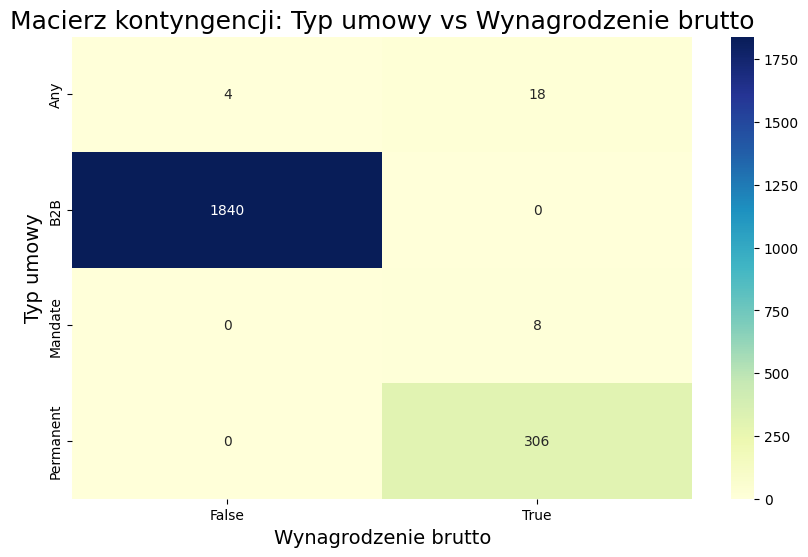

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kreowanie macierzy kontyngencji
contingency_table = pd.crosstab(df['Typ umowy'], df['Wynagrodzenie brutto'])

# Tworzenie heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Macierz kontyngencji: Typ umowy vs Wynagrodzenie brutto', fontsize=18, loc='center')
plt.xlabel('Wynagrodzenie brutto', fontsize=14)
plt.ylabel('Typ umowy', fontsize=14)
plt.show()

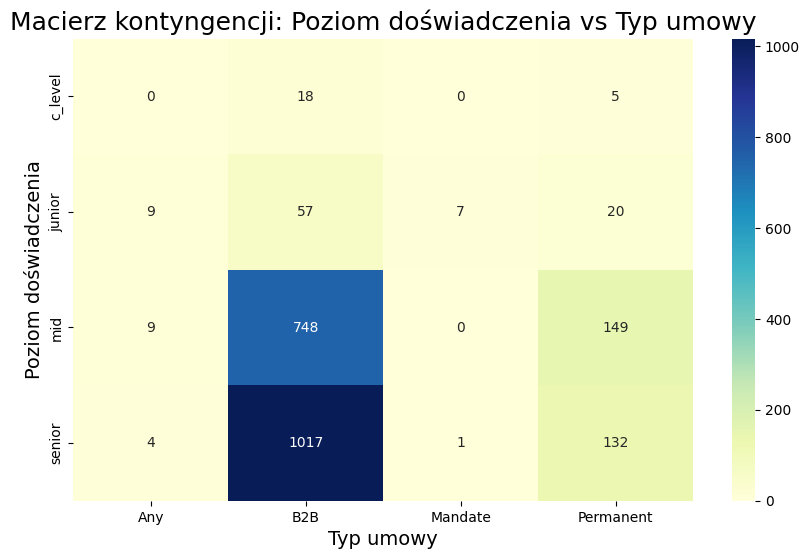

In [140]:
# Kreowanie macierzy kontyngencji
contingency_table = pd.crosstab(df['Poziom doświadczenia'], df['Typ umowy'])

# Tworzenie heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Macierz kontyngencji: Poziom doświadczenia vs Typ umowy', fontsize=18, loc='center')
plt.xlabel('Typ umowy', fontsize=14)
plt.ylabel('Poziom doświadczenia', fontsize=14)
plt.show()

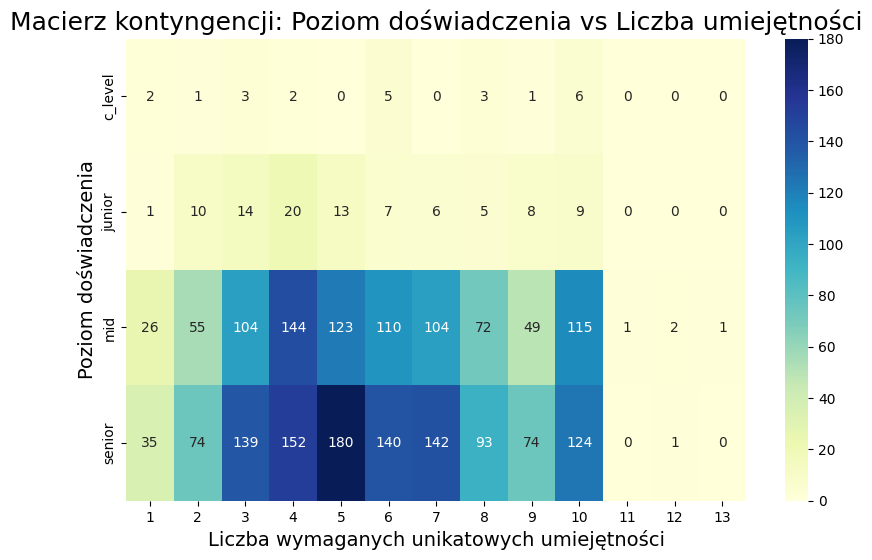

In [141]:
# Kreowanie macierzy kontyngencji
contingency_table = pd.crosstab(df['Poziom doświadczenia'], df['Liczba umiejętności'])

# Tworzenie heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Macierz kontyngencji: Poziom doświadczenia vs Liczba umiejętności', fontsize=18, loc='center')
plt.xlabel('Liczba wymaganych unikatowych umiejętności', fontsize=14)
plt.ylabel('Poziom doświadczenia', fontsize=14)
plt.show()

### Podsumowanie 5 kroku EDA:
* można zauważyć iż poziom doświadczenia wpływa istotnie na wysokość wynagrodzenia (`korelacja=0.53%`) 
* geolokalizacja oferty (województwo) nie ma dużego wpływu na wysokość wynagrodzeń (`korelacja=0.18%`) - co utwierdza w przekonaniu, iż rynek IT bazuje głównie na pracy zdalnej, zatem można mieć wysokie zarobki w każdym z województw
* nie zaobserwowano innych istotnych korelacji
* podczas analizy zależności kategorycznej `Typ umowy` vs `Wynagrodzenie brutto` można wywnioskować, iż silna korelacja `0.92%` wynika z faktu, iż wszystkie umowy `B2B` są podawane bez jawnej informacji o wynagrodzeniu brutto, natomiast umowy `Permanent` tylko i wyłącznie w formie brutto
* macierze z `Poziom doświadczenia` ukazują, iż dane są niezbalansowane - najwięcej ofert dotyczy stanowisk `mid` i `senior` dlatego ciężko znaleźć istotną całościowę korelację związaną z poziomem doświadczenia
* można zaobserwować trend, że im wyższy poziom wykształcenia tym większy odsetek umow `B2B` w stosunku do umów `Permanent`
* na podstawie macierzy `Poziom doświadczenia` vs `Liczba umiejętności` - można zaobserwować przykład, że od wyższych stanowisk wymaga się większej ilości unikatowych umiejętności (`powyżej 11 umiejętności` nie występuje dla stanowisk `Junior`)

---

# <span style="color: red;">EDA - krok 6: analiza wartości odstających

### Box-plots dla danych finansowych

**Wnioski:**
* najwięcej wartości odstających występuje dla doświadczenia `Senior` (zarówno tych poniżej jak i powyżej 1 i 3 kwartyla)
* najbardziej stabilne wynagrodzenia występują dla `Mid` - gdzie outliery nie są mocno oddalone oraz mediana znajduje się blisko środka pomiędzy Q1 i Q3
* występują skrajne minalne outliery dla `Min_wynagrodzenie` w przypadku seniorów (`100`) oraz dla `Max_wynagrodzenie` w przypadku midów (`30`) oraz seniorów (`130`) - co może świadczyć o stawce godzinowej, a nie wynagrodzeniu miesięcznym
* co ciekawe - oferta z najwyższym wynagrodzeniem (ponad `65k`) należy do stanowiska seniorskiego

In [142]:
# # Przemianowanie danych w długi format dla boxplotów
finance_long_df = pd.melt(df, value_vars=['Min_wynagrodzenie', 'Max_wynagrodzenie'], var_name='Typ_wynagrodzenia', value_name='Wynagrodzenie')

# Tworzenie boxplotu
fig = px.box(df, y='Min_wynagrodzenie', color='Poziom doświadczenia',)


# Ustawienia wykresu
fig.update_layout(
    title=dict(
        text='Wartości odstających dla wynagrodzeń minimalnych wg doświadczenia',
        x=0.5,  # Wycentrowanie tytułu
        xanchor='center',
        font=dict(size=24)  # Ustawienie rozmiaru czcionki tytułu na 24
    ),
    yaxis=dict(
        title='Wynagrodzenie [PLN]',
        title_font=dict(size=18),
    ),
    width=1000,
    height=600
)


fig.show()

In [143]:
# Tworzenie boxplotu
fig = px.box(df, y='Max_wynagrodzenie', color='Poziom doświadczenia',)

# Ustawienia wykresu
fig.update_layout(
    title=dict(
        text='Wartości odstające dla wynagrodzeń maksymalnych wg doświadczenia',
        x=0.5,  # Wycentrowanie tytułu
        xanchor='center',
        font=dict(size=24)  # Ustawienie rozmiaru czcionki tytułu na 24
    ),
    yaxis=dict(
        title='Wynagrodzenie [PLN]',
        title_font=dict(size=18),
    ),
    width=1000,
    height=600
)


fig.show()

In [144]:
# Lista do przechowywania wyników
outliers_list = []

# Grupowanie danych
for name, group in df.groupby('Poziom doświadczenia'):
    # Obliczanie dla Min_wynagrodzenie
    Q1_min = group['Min_wynagrodzenie'].quantile(0.25)
    Q3_min = group['Min_wynagrodzenie'].quantile(0.75)
    IQR_min = Q3_min - Q1_min
    lower_bound_min = Q1_min - 1.5 * IQR_min
    upper_bound_min = Q3_min + 1.5 * IQR_min

    # Zidentyfikowanie wartości odstających dla Min_wynagrodzenie
    min_outliers = group[(group['Min_wynagrodzenie'] < lower_bound_min) | (group['Min_wynagrodzenie'] > upper_bound_min)]

    # Obliczanie dla Max_wynagrodzenie
    Q1_max = group['Max_wynagrodzenie'].quantile(0.25)
    Q3_max = group['Max_wynagrodzenie'].quantile(0.75)
    IQR_max = Q3_max - Q1_max
    lower_bound_max = Q1_max - 1.5 * IQR_max
    upper_bound_max = Q3_max + 1.5 * IQR_max

    # Zidentyfikowanie wartości odstających dla Max_wynagrodzenie
    max_outliers = group[(group['Max_wynagrodzenie'] < lower_bound_max) | (group['Max_wynagrodzenie'] > upper_bound_max)]

    # Dodanie wyników do listy
    if not min_outliers.empty or not max_outliers.empty:
        min_outlier = min_outliers['Min_wynagrodzenie'].min() if not min_outliers.empty else None
        max_outlier = max_outliers['Max_wynagrodzenie'].max() if not max_outliers.empty else None
        outliers_list.append({
            'Poziom doświadczenia': name,
            'Największy Outlier Min_wynagrodzenie': min_outlier,
            'Najmniejszy Outlier Min_wynagrodzenie': min_outliers['Min_wynagrodzenie'].max() if not min_outliers.empty else None,
            'Największy Outlier Max_wynagrodzenie': max_outlier,
            'Najmniejszy Outlier Max_wynagrodzenie': max_outliers['Max_wynagrodzenie'].min() if not max_outliers.empty else None
        })

# Tworzenie DataFrame z wartościami odstającymi
outliers_df = pd.DataFrame(outliers_list)

# Przygotowywanie danych do wykresu
x_labels = outliers_df['Poziom doświadczenia']

# Tworzenie podwykresów (subplots)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Min_wynagrodzenie', 'Max_wynagrodzenie'))

# Wykres słupkowy dla Największy i Najmniejszy Outlier Min
fig.add_trace(go.Bar(
    x=x_labels,
    y=outliers_df['Największy Outlier Min_wynagrodzenie'],
    name='Największy Outlier Min',
    marker_color='blue',
    text=outliers_df['Największy Outlier Min_wynagrodzenie'],  # Etykieta
    textposition='auto'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=x_labels,
    y=outliers_df['Najmniejszy Outlier Min_wynagrodzenie'],
    name='Najmniejszy Outlier Min',
    marker_color='lightblue',
    text=outliers_df['Najmniejszy Outlier Min_wynagrodzenie'],  # Etykieta
    textposition='auto'
), row=1, col=1)

# Wykres słupkowy dla Największy i Najmniejszy Outlier Max
fig.add_trace(go.Bar(
    x=x_labels,
    y=outliers_df['Największy Outlier Max_wynagrodzenie'],
    name='Największy Outlier Max',
    marker_color='red',
    text=outliers_df['Największy Outlier Max_wynagrodzenie'],  # Etykieta
    textposition='auto'
), row=1, col=2)

fig.add_trace(go.Bar(
    x=x_labels,
    y=outliers_df['Najmniejszy Outlier Max_wynagrodzenie'],
    name='Najmniejszy Outlier Max',
    marker_color='lightcoral',
    text=outliers_df['Najmniejszy Outlier Max_wynagrodzenie'],  # Etykieta
    textposition='auto'
), row=1, col=2)

# Ustawienia wykresu
fig.update_layout(
    title=dict(
    text='Największe i najmniejsze outliery dla Min i Max wynagrodzenia',
    x=0.5,  # Wycentrowanie tytułu
    xanchor='center',
    font=dict(size=24)  # Ustawienie rozmiaru czcionki tytułu na 24
),
    width=1000,
    height=600
)

fig.show()

### Box-plots dla `Liczba umiejętności`

**Wnioski:**
* nie ma wartości odstających
* najwięcej umiejętności wymaga się od stanowisk `Senior` oraz `Mid`
* nie zaobserwowano zauważalnych rozrzutów wśród liczby umiejętności
* przeciętna liczba wymaganych umiejętności, którą oczekują pracodawcy wynosi `5-6` (mediana)

In [145]:
# Tworzenie boxplotu tylko dla "Liczba umiejętności"
fig = px.box(df, x='Poziom doświadczenia', y='Liczba umiejętności', color='Poziom doświadczenia')

# Ustawienia wykresu
fig.update_layout(
    title=dict(
        text='Boxplots dla liczby umiejętności w zależności od poziomu doświadczenia',
        x=0.5,
        xanchor='center',
        font=dict(size=24)
    ),
    yaxis=dict(
        title='Liczba umiejętności',
        title_font=dict(size=18),
    ),
    xaxis=dict(
        title='Poziom doświadczenia',
        title_font=dict(size=18),
    ),
    width=1000,
    height=600
)

fig.show()

### Podsumowanie 6 kroku EDA:
* najwięcej wartości odstających występuje dla doświadczenia `Senior` 
* występują skrajne minimalne outliery dla `Min_wynagrodzenie` w przypadku seniorów (`100`) oraz dla `Max_wynagrodzenie` w przypadku midów (`30`) oraz seniorów (`130`) - co może świadczyć o stawce godzinowej, a nie wynagrodzeniu miesięcznym
* oferta z najwyższym wynagrodzeniem (ponad `65k`) należy do stanowiska seniorskiego
* dla `Liczba umiejętności` nie ma wartości odstających oraz nie zaobserwowano zauważalnych rozrzutów, a przeciętna liczba umiejętności, ktorą wymagają pracodawcy, zawiera się w przedziale `5-6`

---

## <span style="color: red;">Wnioski końcowe
#### Przeanalizowano dane ze strony JustJoinIT związane z ofertami pracy w branży IT. Dane dotyczyły m.in.: wymaganych umiejętności, widełek finansowych, rodzajów zatrudnienia czy geolokalizacji. Dokonując analizy EDA wysnuto następujące wnioski:

* rynek IT jest niezwykle dynamiczny co pokazuje fakt, że aż `90%`ofert pod kątem umiejętności jest unikatowych
* unaocznia się popyt na oferty IT zależny od geolokalizacji (oferty pochodzą zaledwie z `40` miast w Polsce), z czego aż `51%` pochodzi z Warszawy
* najczęściej występujące wynagrodzenie zawiera się w zakresie: `15-30k`
* najwięcej ofert znajduje się w kategoriach: `JS`, `Java` oraz `Data` i stanowią one niemal `33%` wszystkich dostępnych ofert
* najczęściej zatrudniającą firmą jest `Link Group` i liczba ofert tego pracodawcy stanowi `4%` wszystkich ofert
* najczęściej wymaganymi umiejętnościami są: języki programowania `Python`, `SQL` oraz `Java`, które sumarycznie stanowią ponad połowę (niemal `56%`) wszystkich wymaganych umiejętności na rynku IT
* wynagrodzenie rośnie proporcjonalnie wraz z poziomem doświadczenia, jednak im wyższy szczebel tym mniejsza zmiana, np. `mid` zarobi średnio `2.09%` więcej niż `junior`, podczas gdy na najwyższym szczeblu `c_level` zarobi się jedynie `1.22%` więcej od stanowiska `senior`
* jedynie `17%` pracodawców podaje jawnie informacje o wynagrodzeniu brutto
* niemal wszystkie obecne oferty pracy dotyczą poziomów: `mid` oraz `senior` (niemal `95%`) - przy czym ofert `junior` jest obecnie zaledwie nieco ponad `4%`
* niemal wszystkie obecne oferty pracy dotyczą standardowej pracy na pełen etat: `full_time` (ponad `97%`)
* ponad połowa ofert (aż `53%`) dotyczy tylko i wyłącznie pracy zdalnej przy czym druga połowa w większości jest związana z pracą hybrydową
* oferty dla przedsiębiorców `B2B` stanowią niemal `85%` wszystkich dostępnych ofert na rynku IT (jest ich 6krotnie więcej niż dla standardowych umów `Permanent`)
* dane dotyczące województw ukazują, iż geolokalizacja nie ma dużego wpływu na wysokość wynagrodzeń - co utwierdza w przekonaniu, iż rynek IT bazuje głównie na pracy zdalnej, zatem można mieć wysokie zarobki niezależnie od miejsca zamieszkania
* można zaobserwować trend, że im wyższy poziom doświadzenia tym większy więcej zawieranych jest umów `B2B` od tych standardowych `Permanent`
* najwięcej wartości odstających występuje dla wynagrodzeń seniorskich
* występują skrajne wartości wynagrodzeń na poziomie `30`, `100` PLN, co może świadczyć, iż pracodawcy podają również stawki godzinowe w ofertach
* oferta z najwyższym wynagrodzeniem (ponad `65k`) należy do stanowiska seniorskiego
* przeciętna liczba umiejętności, ktorą wymagają pracodawcy, zawiera się w przedziale `5-6`